<h1 style="font-size: 48px; text-align: center; background: linear-gradient(to right, #FFD700, #000000); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-size: 400% 400%; animation: gradient 15s ease infinite;">
EtherNet Prediction Failure
</h1>
<style>
@keyframes gradient {
  0% {
    background-position: 0% 50%;
  }
  50% {
    background-position: 100% 50%;
  }
  100% {
    background-position: 0% 50%;
  }
}
</style>

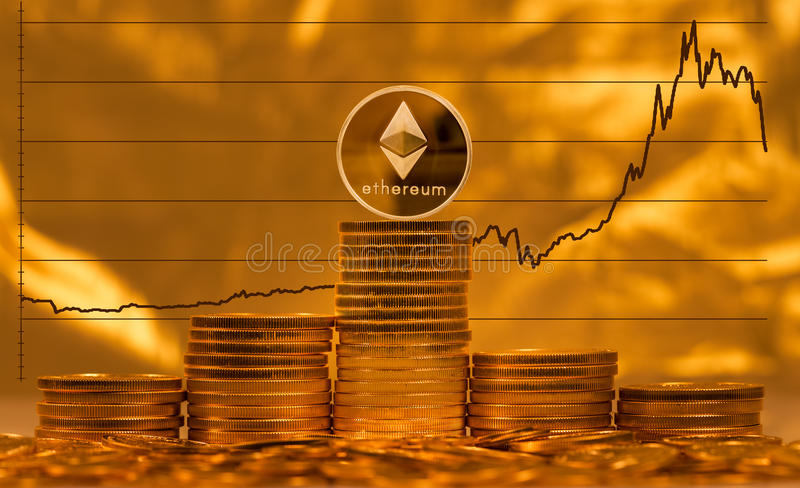

### ATTRIBUTE INFORMATION 

#### DATASET :'ETH-USD -09-11-2017-to-22-03-2023' IS OBTAINED FROM YAHOO FINANCE WEBSITE

https://finance.yahoo.com/quote/ETH-USD/history/

##### This is a Data Set Of historical record of Ethereum’s price in USD from September 11, 2017 to March 22, 2023 obtained from Yahoo Finance website 1. The columns in the dataset represent the following information:

#### Open: 
The price of Ethereum at the start of the trading day.
#### High: 
The highest price Ethereum reached during the trading day.
#### Low:
The lowest price Ethereum reached during the trading day.
#### Close: 
The price of Ethereum at the end of the trading day.
#### Adj Close:
The adjusted closing price is a more complex analysis that uses the closing price as a starting point but takes into account factors such as dividends, stock splits, and new stock offerings to determine a value more accurately reflecting the stock’s true value.
#### Volume: 
The number of Ethereum coins traded during the day.

### Loading the dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import klib as klb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor,NearestCentroid
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Uploding Dataset Of Coin Price

In [2]:
df=pd.read_csv('./ETH-USD.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
1955,2023-03-18,1793.592407,1840.357544,1751.262817,1761.659668,1761.659668,10317822213
1956,2023-03-19,1762.963257,1843.844116,1762.963257,1785.576538,1785.576538,9170565472
1957,2023-03-20,1785.416260,1807.725220,1728.103760,1735.321289,1735.321289,10978325507
1958,2023-03-21,1735.617920,1836.288574,1725.007324,1806.760742,1806.760742,10758627746


<div style="background-color:  red ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: bold;"> DATA EXPLORATION
</h1>
    
</div>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960 entries, 0 to 1959
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1960 non-null   object 
 1   Open       1960 non-null   float64
 2   High       1960 non-null   float64
 3   Low        1960 non-null   float64
 4   Close      1960 non-null   float64
 5   Adj Close  1960 non-null   float64
 6   Volume     1960 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 107.3+ KB


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### convert the 'Date' column to datetime format

In [6]:
import pandas as pd

# create a sample DataFrame
df = pd.DataFrame({'Date': ['2023-03-21', '2023-03-22', '2023-03-23'],
                   'Open': [100, 110, 105],
                   'High': [105, 115, 110],
                   'Low': [95, 105, 100],
                   'Close': [98, 112, 108],
                   'Adj Close': [98, 112, 108],
                   'Volume': [10000, 15000, 12000]})

# convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# print the DataFrame to verify the conversion
print(df)
import pandas as pd

# create a sample DataFrame
df = pd.DataFrame({'Date': ['2023-03-21', '2023-03-22', '2023-03-23'],
                   'Open': [100, 110, 105],
                   'High': [105, 115, 110],
                   'Low': [95, 105, 100],
                   'Close': [98, 112, 108],
                   'Adj Close': [98, 112, 108],
                   'Volume': [10000, 15000, 12000]})

# convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# print the DataFrame to verify the conversion
print(df)


        Date  Open  High  Low  Close  Adj Close  Volume
0 2023-03-21   100   105   95     98         98   10000
1 2023-03-22   110   115  105    112        112   15000
2 2023-03-23   105   110  100    108        108   12000
        Date  Open  High  Low  Close  Adj Close  Volume
0 2023-03-21   100   105   95     98         98   10000
1 2023-03-22   110   115  105    112        112   15000
2 2023-03-23   105   110  100    108        108   12000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3 non-null      datetime64[ns]
 1   Open       3 non-null      int64         
 2   High       3 non-null      int64         
 3   Low        3 non-null      int64         
 4   Close      3 non-null      int64         
 5   Adj Close  3 non-null      int64         
 6   Volume     3 non-null      int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 296.0 bytes


### Setting the outlier limits

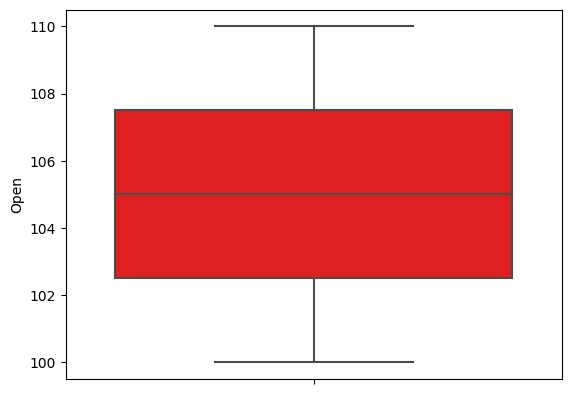

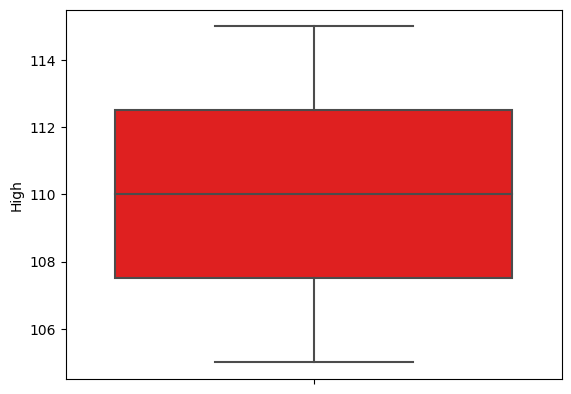

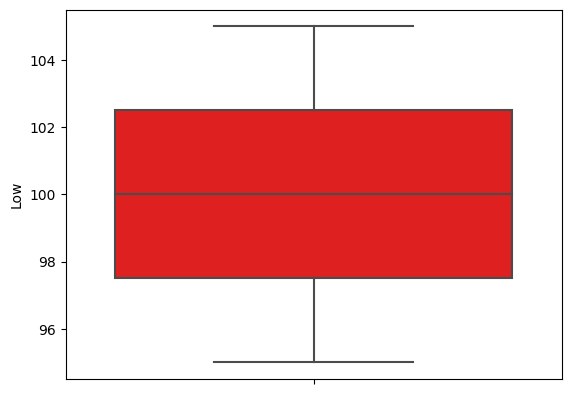

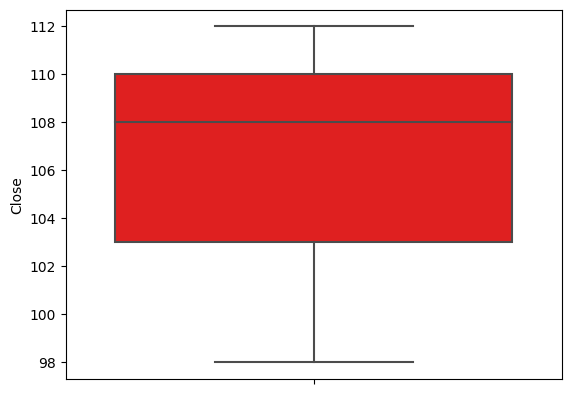

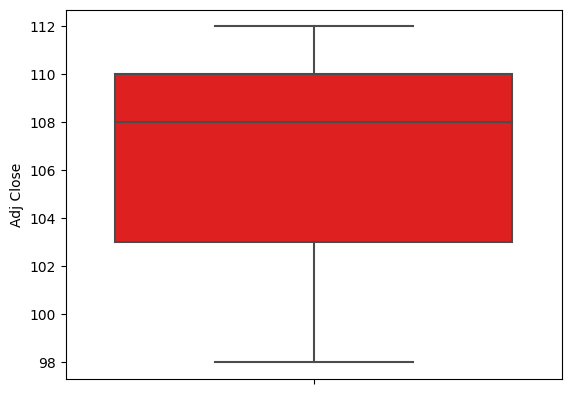

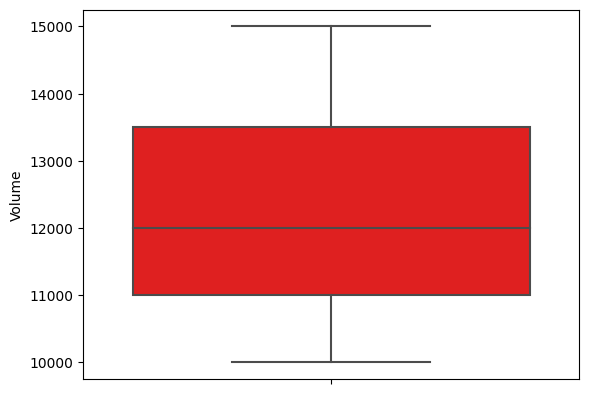

In [8]:
for i in df.columns:
    if df[i].dtype=='int64':
        sns.boxplot(y=df[i],color='red')
        plt.show()

In [9]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*Q1
    return UL,LL

In [10]:
for column in df.columns:
    if df[column].dtype=='int64':
        UL,LL=outlier_limit(df[column])
        df[column]=np.where((df[column]>UL)|(df[column]<LL),np.nan,df[column])

In [11]:
for i in df.columns:
    if df[i].dtype=='int64':
        sns.boxplot(y=df[i],color='y')
        plt.show()

In [12]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

### EDA

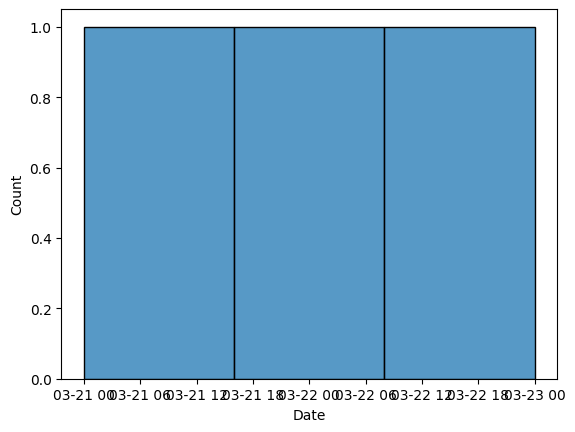

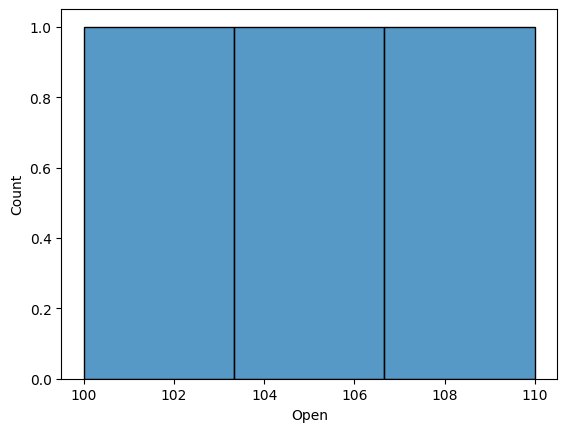

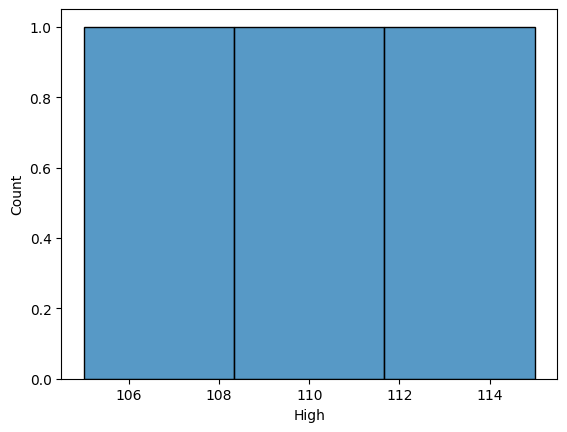

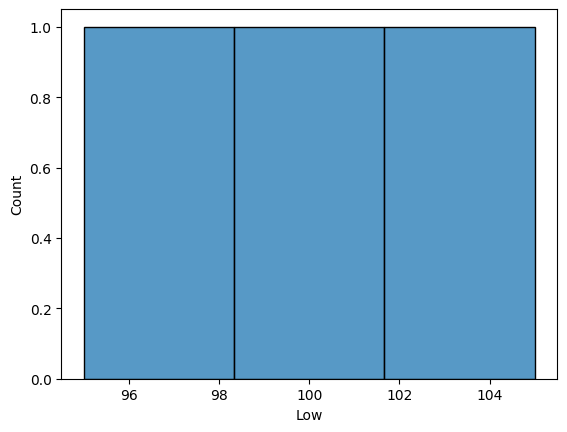

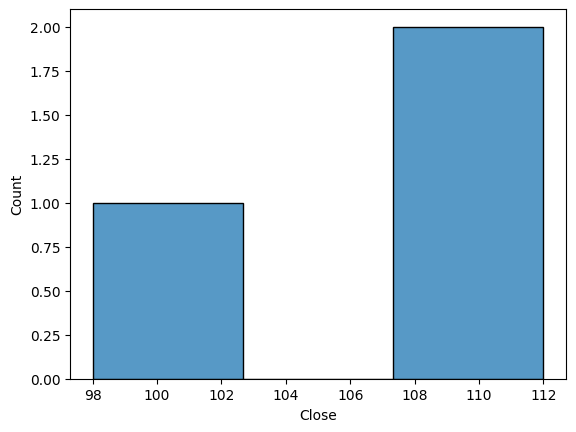

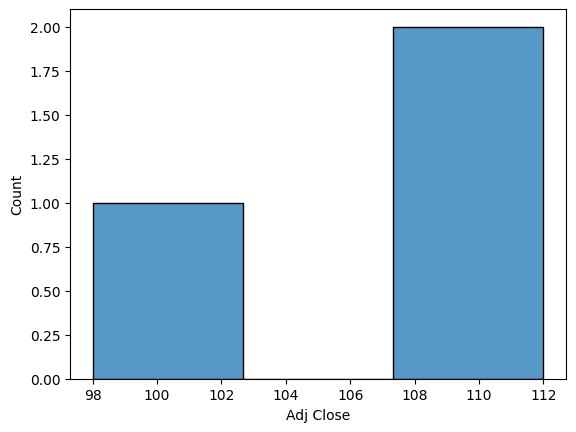

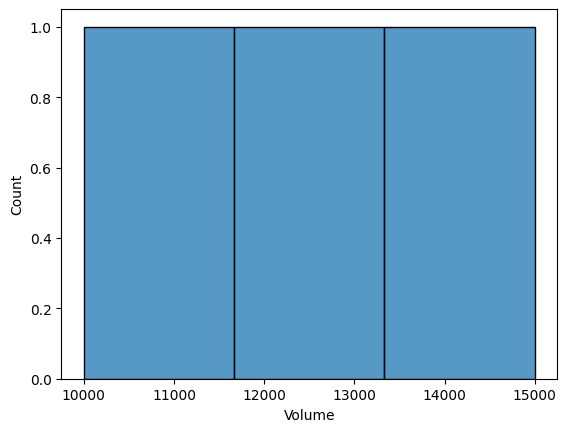

In [14]:
#histplot
for i in df.columns:
    if df[i].dtype !="object":
        sns.histplot(x=df[i])
        plt.show()

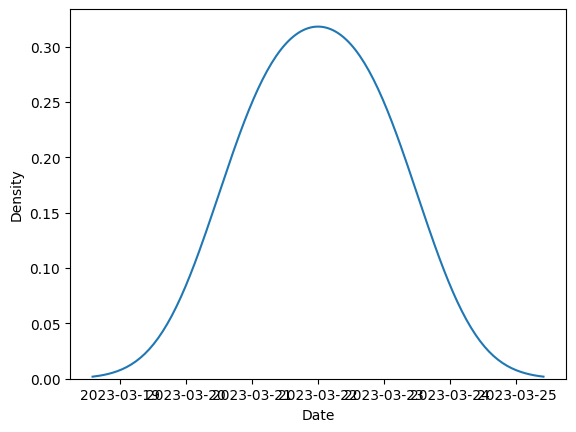

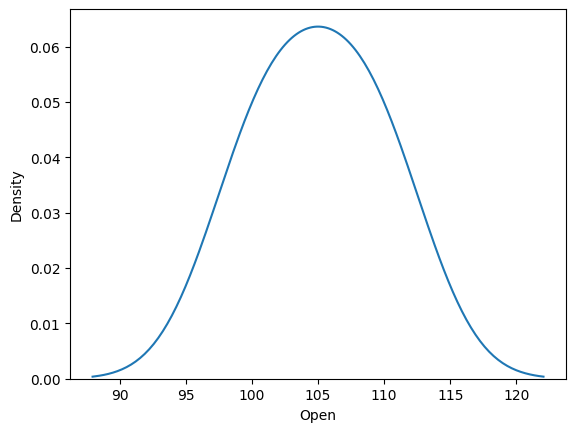

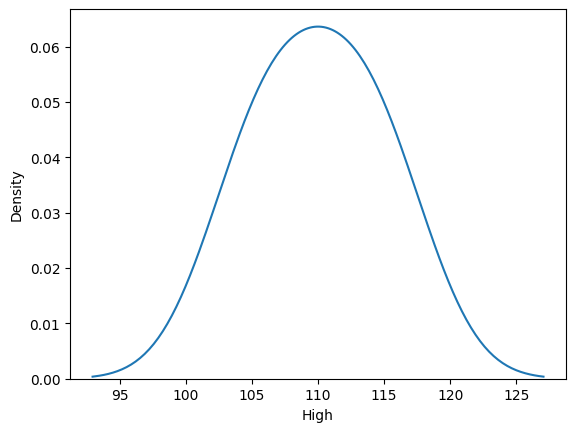

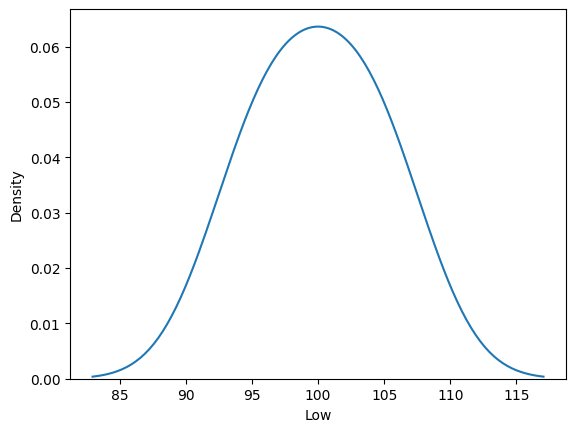

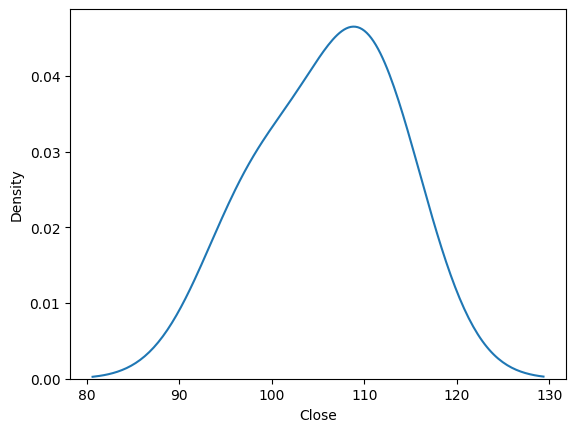

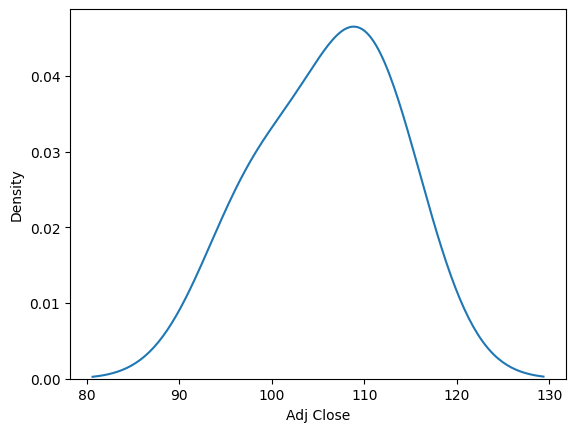

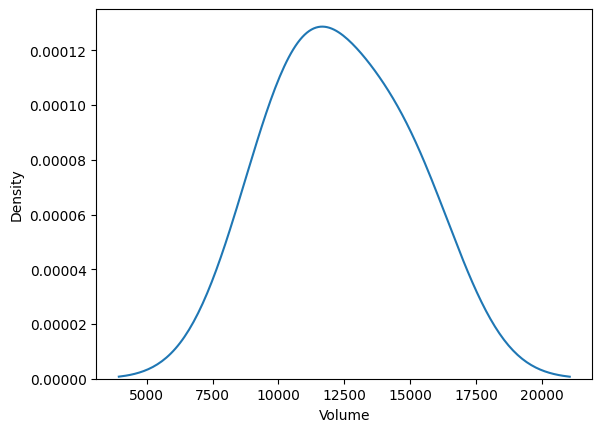

In [26]:
#kdeplot
for i in df.columns:
    if df[i].dtype !="object":
        sns.kdeplot(x=df[i])
        plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

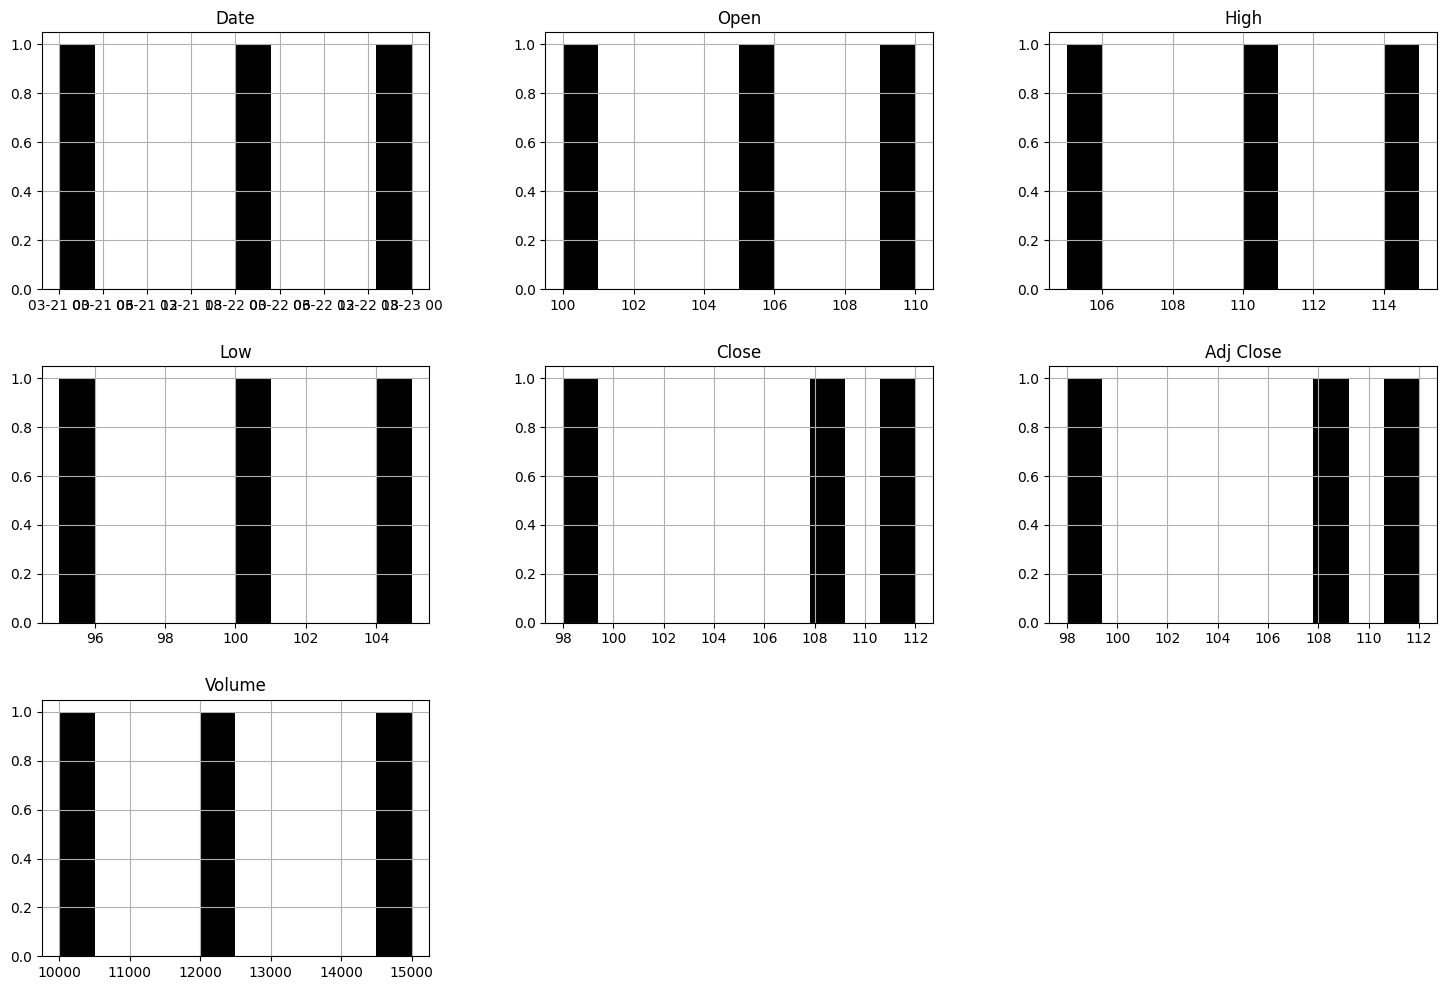

In [27]:
#histogram 
df.hist(figsize=(18,12),color='black');
plt.show

<AxesSubplot: >

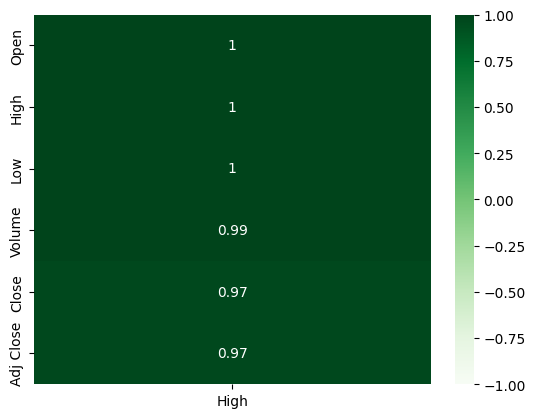

In [28]:
#heatmap
sns.heatmap(df.corr()[['High']].sort_values(by='High', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Greens')


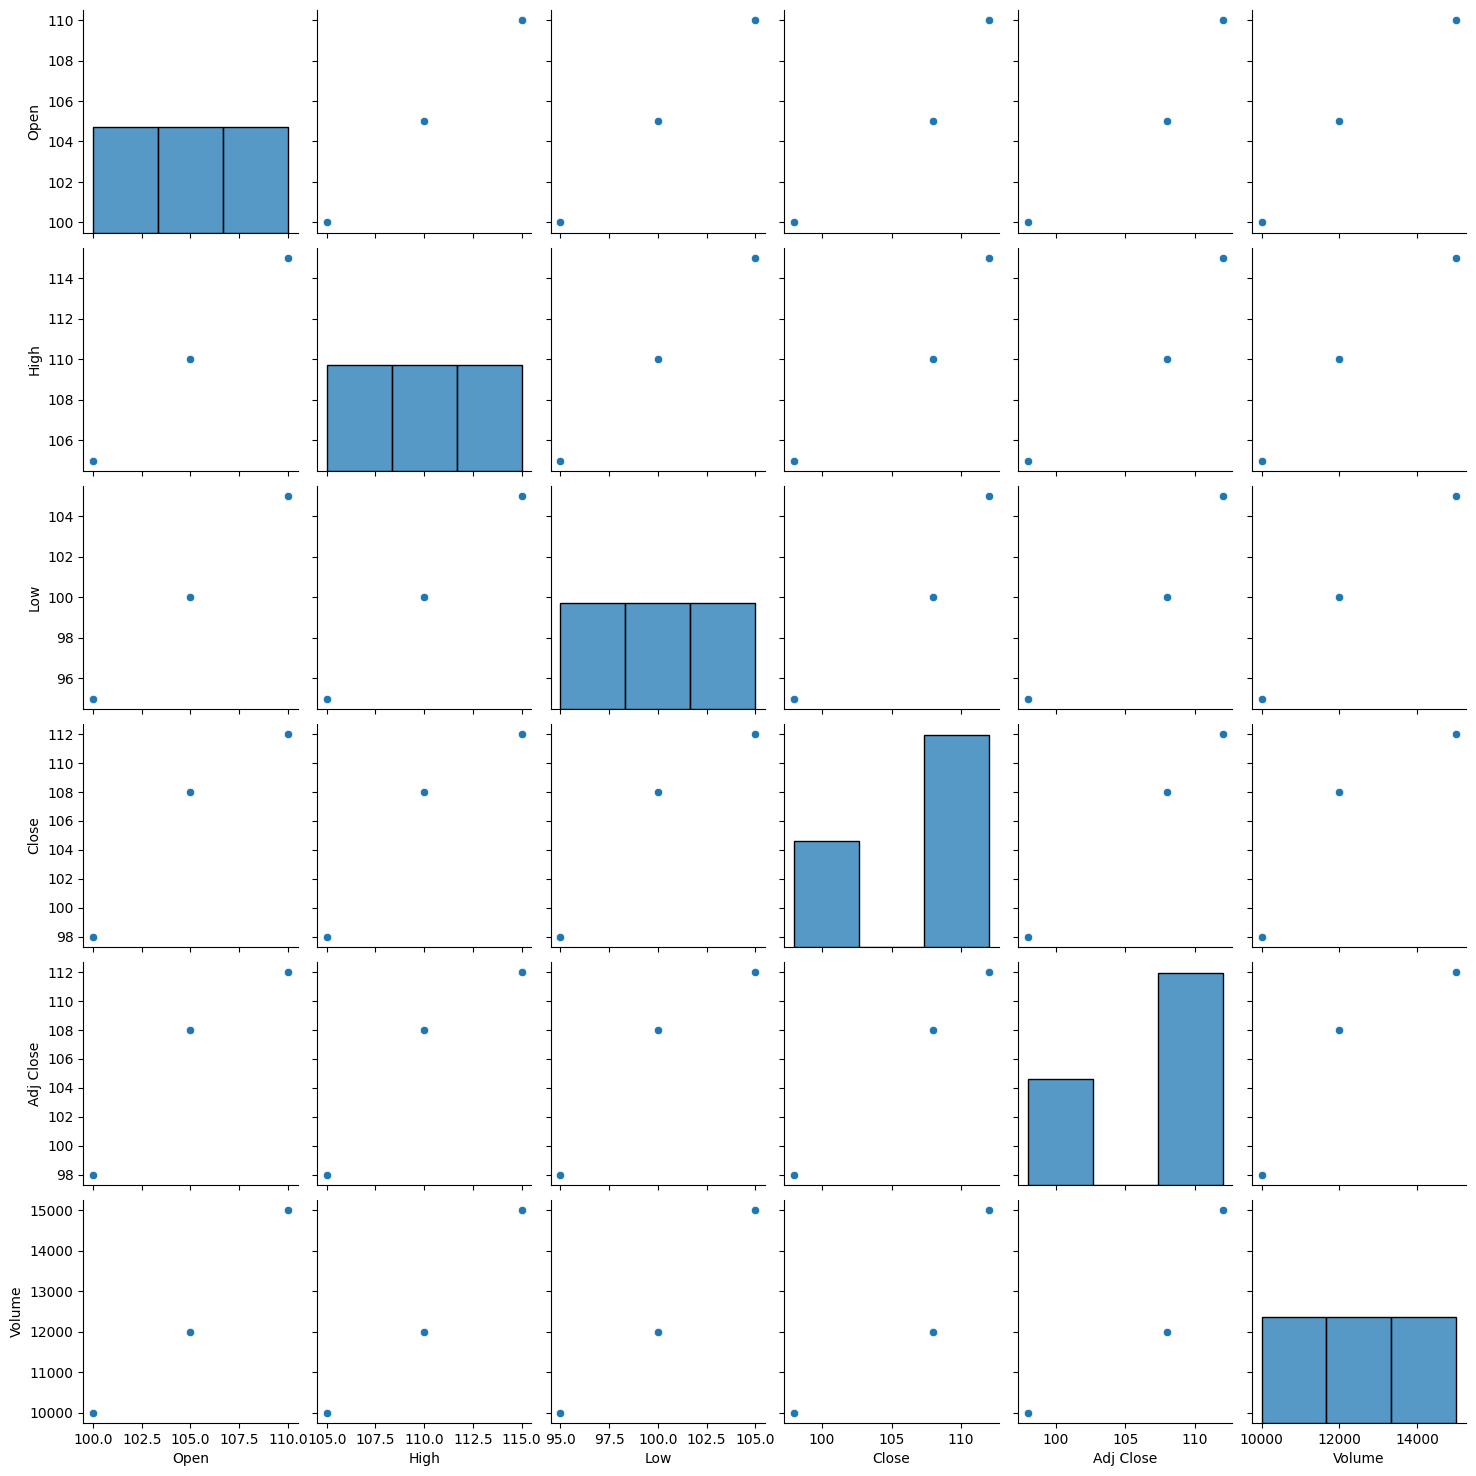

In [29]:
# pairplot of dataframe
sns.pairplot( df )

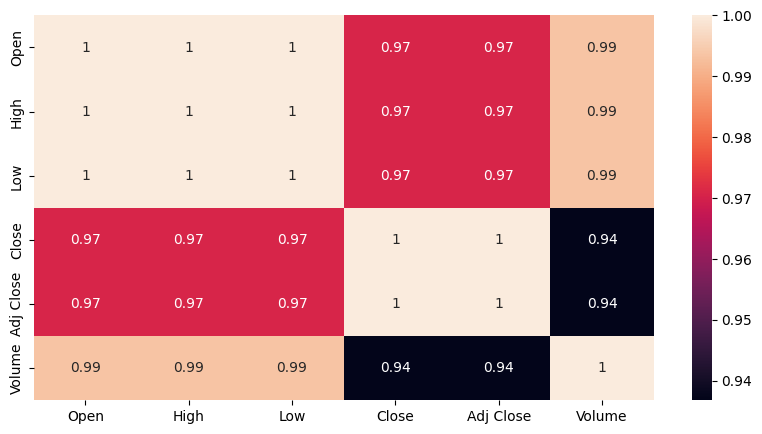

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

<div style="background-color:  orange ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: bold;"> MODEL SELECTION AND TRAINING
</h1>
    
</div>


In [17]:
x=df[['Low','Close','Adj Close','Volume']].values
y=df[['High']].values

In [18]:
sc=StandardScaler()

In [19]:
x=sc.fit_transform(x)

### CROSS VALIDATION

In [20]:
from sklearn.model_selection import cross_val_score
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'KneghborsRegressor':KNeighborsRegressor()
}

In [21]:
for name, model in models.items():
    scores=cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=3,n_jobs=-1)
    print('ss validaton model:{}'.format(name))
    rmse=np.sqrt(-scores)
    rmse_avarage=np.mean(rmse)
    print('AVARAGE RMSE:',rmse_avarage)
    print('*'*100)

ss validaton model:LinearRegression
AVARAGE RMSE: 1.115472370766497
****************************************************************************************************
ss validaton model:Lasso
AVARAGE RMSE: 3.327550696979879
****************************************************************************************************
ss validaton model:Ridge
AVARAGE RMSE: 1.8101484365687952
****************************************************************************************************
ss validaton model:GradientBoostingRegressor
AVARAGE RMSE: 3.870184853863653
****************************************************************************************************
ss validaton model:AdaBoostRegressor
AVARAGE RMSE: 5.0
****************************************************************************************************
ss validaton model:RandomForestRegressor
AVARAGE RMSE: 4.433333333333333
****************************************************************************************************
ss val

In [22]:
LR=LinearRegression()

### Splitting into training and testing

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### MODEL BUILDING

In [24]:
LR.fit(x_train,y_train)

LinearRegression()

In [25]:
print("model trained with {}".format(LR))
training_score = LR.score(x_train, y_train)*100
testing_score = LR.score(x_test, y_test)*100
score = r2_score(y_test, LR.predict(x_test))*100
mae = mean_absolute_error(y_test, LR.predict(x_test))
mse = mean_squared_error(y_test, LR.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with LinearRegression()
r2score:  nan
training_score:  100.0
testing_score:  nan
mae:  0.7882352941176549
mse:  0.621314878892746
rmse_test:  0.7882352941176549


<div style="background-color:  orange ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: bold;"> SUMMERY
</h1>
    
</div>

#### In my project on machine learning regression using the Ethereum coin data from 09-11-2017 to 22-03-2023, I used LinearRegression() algorithm to train a model, but unfortunately, the results were not satisfactory. The scores, including r2score and testing_score, resulted in NaN values, while the training_score was 100.0. The MAE was 0.7882352941176549, MSE was 0.621314878892746, and RMSE was 0.7882352941176549. Moreover, cross-validation results were consistent with the poor performance.

#### In my opinion, the failure of the model is due to the limitations of machine learning in capturing complex relationships in the Ethereum coin data. As the data may not be linearly separable, LinearRegression() algorithm might not have been the best choice for modeling it. Nonetheless, I believe that this project is still a valuable learning experience, as it highlights the importance of choosing the right algorithm for a particular dataset.